# Zeit für Qiskit!

Jetzt legen wir mit der IBM library (Bibliothek für Quantencomputing, haben wir schon installiert) los, endlich 😊

Im Folgenden bekommt ihr jeweils einen Beispielcode und dazu eine Aufgabe. Mehr Tutorials findet ihr [hier](https://qiskit.org/documentation/tutorials.html#tutorials) und Informationen zu Qiskit [hier](https://qiskit.org/documentation/index.html). Und wer richtig viel Zeit hat (haben wir im Kurs leider nicht..), kann sich diese [extrem gute Einführung](https://qiskit.org/textbook/preface.html) anschauen

----

## Beispiel 1

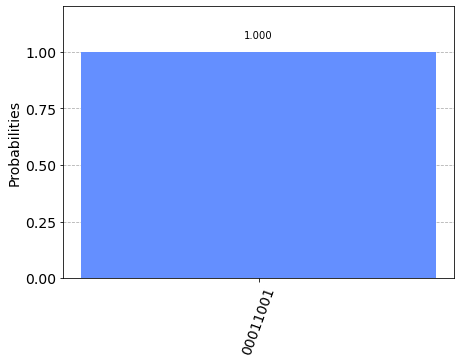

In [2]:
#
# Ein erster Circuit (Schaltkreis)
# Importiere Module + Speichere Informationen in einem (Qu)Bit
#
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

#
# Bastele einen Circuit zusammen
# Input Qubits
qc_output = QuantumCircuit(8)
# Messe alle
qc_output.measure_all()
# Male den Cirquit auf
qc_output.draw(initial_state=True) 

# Hier wird ein Quantum Computer Klassisch Simuliert
# Welchen Simulator will ich?
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
# Qubits werden immer mit 0 initialisiert!
plot_histogram(counts)

#
# Speichere Infors
#
# Initialisiere 8 Qubits
qc_encode = QuantumCircuit(8)
# Initialisiere eine Zahl
# Alle werden zu 0 initialisiert, der letzte wird zu 1 geändert!
# Benutzt wird dazu das NOT gate, (x)
qc_encode.x(0)
qc_encode.x(3)
qc_encode.x(4)

# Messen nicht vergessen!
qc_encode.measure_all()
qc_encode.draw()

result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

# Ende des Beispiels
#
# Aufgabe 1: 
# Sucht euch eine Zahl und setzt euren Anfangsqubit auf diesen Wert!



## Aufgabe 1:

Sucht euch eine Zahl und setzt euer Anfangsqubit auf diesen Wert!

## Beispiel 2:

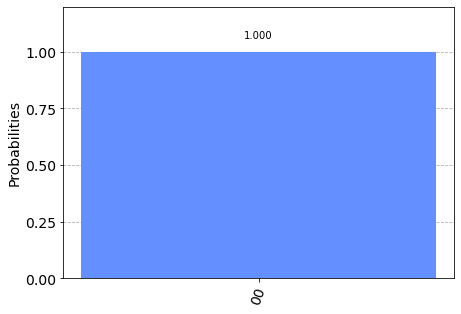

In [4]:
#
# Ein zweiter Circuit
# Addition
#
from qiskit import assemble

# The XOR Gate: realisiert mit controlled-not (CNOT)
qc = QuantumCircuit(2,2)
qc.x(0)
#qc.x(1)
## controlled not: falls q0 den Wert 1 hat wird not auf q1 angewendet
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

# Übliches Auswerten!
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

# Nutze CNOT um auf anderen Qubit zu schreiben!
qc_ha = QuantumCircuit(4,2)

#qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
#qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
# Encoding done: Barriere!
qc_ha.barrier()
# Nutze CNOTs
# Kopiere den ersten Bit auf 2
qc_ha.cx(0,2)
# Wende XOR auf die Kopie an
qc_ha.cx(1,2)

# NEUES Gate Toffoli: Kontrolliert 2 inputs für NOT
# Classisches AND gate (Der Alleskönner!!)
qc_ha.ccx(0,1,3)
# Cirquit done: Barriere!
qc_ha.barrier()
# Messe nur input Qubits 2 und 3 
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

result = sim.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)

# Ende des Beispiels
#
# Aufgabe 2: 
# Schreibt einen Circuit, der mehr als eine Ziffer addieren kann!
# (Bonus:) Schreib euch eine Phython Funktion, so dass das ganze nicht manuell
# eingetippt werden muss

## Aufgabe 2:

Schreibt einen Schaltkreis (Circuit), der mehr als eine Ziffer addieren kann! (Bonus:) Schreib euch eine Phython Funktion, so dass das ganze nicht manuell eingetippt werden muss.

## Beispiel 3:

In [5]:
#
# Ein erster QuantenCircuit! 
#
from qiskit.visualization import plot_bloch_vector
from math import sqrt, pi

sim = Aer.get_backend('aer_simulator') 

# Cirquit mit einem Qubit
qc = QuantumCircuit(1)
# Definiere Anfangszstd über eine Liste + initialisiere das QB
initial_state = [sqrt(1/2),sqrt(1/2)*1j] 
qc.initialize(initial_state, 0)
# Speichere Zustandsvektor und erstelle ein Quantenobjekt für den Simulator!
qc.save_statevector()   
qobj = assemble(qc)   # NEU! 

result = sim.run(qobj).result() 

# Gebe outputvektor an!
out_state = result.get_statevector()
print(out_state) 

qc.measure_all()
qc.draw()

qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

# Checke Zustandsvektor nach der Messung...
qc = QuantumCircuit(1) # Neues QC
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw()

qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("Zustand nach Messung = " + str(state))

#  Wichitg: bei einem richtigen QuantenComputer kann man nicht den Zustands- 
#  vektor "spicken". Das geht nur bei dem aer_simulator und dient einem
#  pädagogischen Zweck.

#
# Aufgabe: Probiert ein bisschen rum mit Zustandsvektoren, 
# was für Wahrscheinlichkeiten funktionieren, was passiert bei mehreren Qubits?
#

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))
Zustand nach Messung = Statevector([0.+1.j, 0.+0.j],
            dims=(2,))


## Aufgabe 3:

Probiert ein bisschen rum mit Zustandsvektoren, was für Wahrscheinlichkeiten funktionieren, was passiert bei mehreren Qubits?